In [1]:
# Sparse Hebbian Learning 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

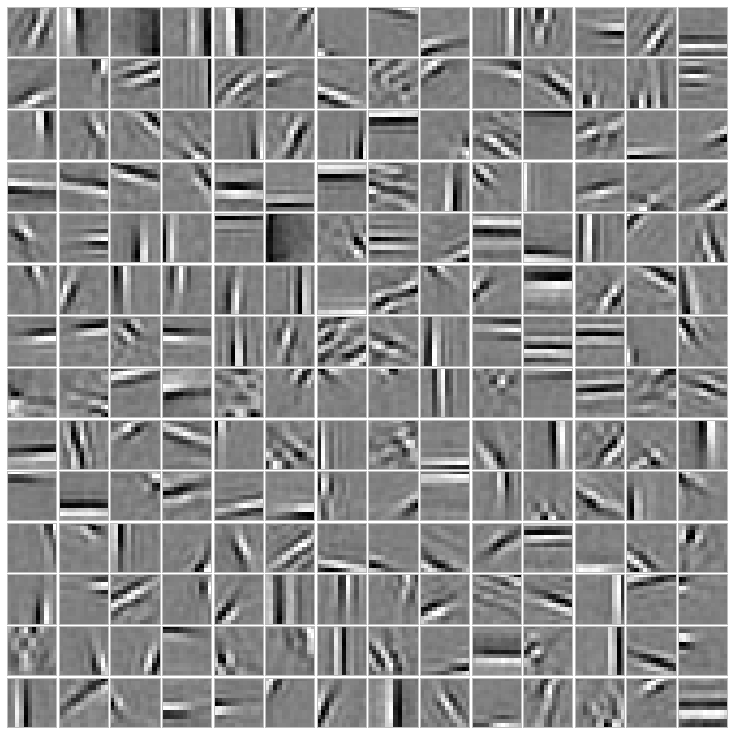

In [5]:
from shl_scripts import SHL
shl = SHL()
dico = shl.learn_dico()
_ = shl.show_dico(dico, fname='ssc_homeo_hist.png')

(<matplotlib.figure.Figure at 0x1190ae5d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11914bbd0>)

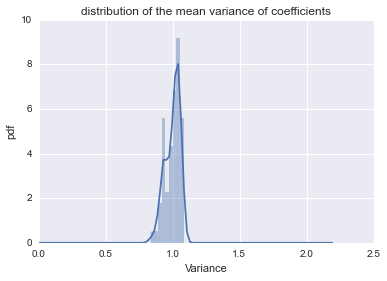

In [6]:
_ = shl.plot_variance_histogram(dico, fname='ssc_homeo_hist.png')

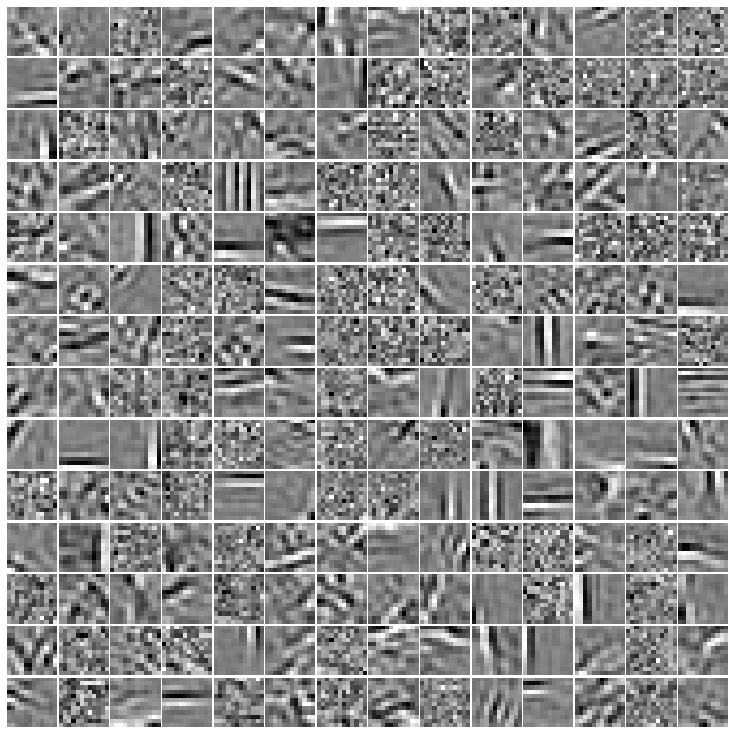

In [8]:
from shl_scripts import SHL
shl = SHL(eta_homeo=0.)
dico = shl.learn_dico()
_ = shl.show_dico(dico, fname='ssc_nohomeo_hist.png')

In [ ]:
_ = shl.plot_variance_histogram(dico, fname='ssc_nohomeo_hist.png')

## Version used

In [ ]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, shl_scripts